# Introduction

War, pandemic and plunging stock markets have dented the fortunes of many of the richest people on the planet this year. Forbes found 2,668 billionaires around the globe for the 2022 World’s Billionaires list, down from a record 2,755 last year. Collectively, they’re worth 12.7 trillion, down from a record 13.1 trillion on the 2021 list.

In all, 329 people fell off the billionaires list this year—the most since the 2009 financial crisis. That includes 169 “one-year wonders,” newcomers to the 2021 ranking, including Bumble’s Whitney Wolfe Herd and Peloton’s John Foley, who debuted a year ago and have already dropped from the list.

Still, 236 newcomers joined the ranks this year, including pop star Rihanna, Lord of the Rings director Peter Jackson and venture capitalist Josh Kushner. Barbados, Bulgaria, Estonia and Uruguay each gained their first billionaires ever. And, despite the volatile year, 1,050 billionaires are wealthier than they were a year ago.

No one got richer than Elon Musk, who tops the World’s Billionaires list for the first time ever. As of March 11, when we locked in net worths, Musk was worth an estimated 219 billion, after adding 68 billion to his fortune over the past year on the back of a 33% jump in the share price of his electric vehicle maker Tesla. He surpassed Jeff Bezos, who fell to No. 2 for the first time in four years due to a 3% drop in Amazon stock and increased charitable giving, which wiped 6 billion from his net worth. French luxury goods tycoon Bernard Arnault, who added 8 billion to his fortune over the past year, remains the world’s third-richest person. Rounding out the top 5 are Bill Gates and Warren Buffett.

<h3>Below, you can access a data analysis of the list, where using the content table will take you to any of the topics. The analysis consists of a visualization and a conclusion based on that. Please feel free to make suggestions and corrections, and I'm sorry for any English grammar mistakes. </h3>

"* Due to the lack of time, some conclusions are missing but will soon be filled."

# Content Table <a class='anchor' id='inicio'></a>

* [Libraries and Data import](#t1)
* [Understanding the data](#t2)
* [Analysis](#t3)
    * [Code Functions](#t3_1)
    * [Overall and Gender](#t3_2)
        * [Overall](#t3_2_1)
        * [Male](#t3_2_2)
        * [Female](#t3_2_3)
    * [Countries](#t3_3)
        * [United States](#t3_3_1)
        * [China](#t3_3_2)
        * [Brazil](#t3_3_3)

## Libraries and Data import <a class='anchor' id='t1'></a>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects


In [2]:
df = pd.read_csv("/kaggle/input/forbes-billionaires-and-companies-2022/forbes_dataset_2022/forbes_billionaires_2022.csv")

## Understanding the data <a class='anchor' id='t2'></a>

In [3]:
df.head()

,rank,personName,age,finalWorth,category,source,country,state,city,organization,selfMade,gender,birthDate,title,philanthropyScore,bio,about
0,1,Elon Musk,50.0,219000,Automotive,"Tesla, SpaceX",United States,Texas,Austin,Tesla,True,M,6/28/1971,CEO,1.0,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000,Technology,Amazon,United States,Washington,Seattle,Amazon,True,M,1/12/1964,Entrepreneur,1.0,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000,Fashion & Retail,LVMH,France,NaN,Paris,LVMH Moët Hennessy Louis Vuitton,False,M,3/5/1949,Chairman and CEO,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000,Technology,Microsoft,United States,Washington,Medina,Bill & Melinda Gates Foundation,True,M,10/28/1955,Cofounder,4.0,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000,Finance & Investments,Berkshire Hathaway,United States,Nebraska,Omaha,Berkshire Hathaway,True,M,8/30/1930,CEO,5.0,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [4]:
df.shape

(2668, 17)

In [5]:
df.isnull().sum()

rank                    0
personName              0
age                    86
finalWorth              0
category                0
source                  0
country                13
state                1920
city                   44
organization         2316
selfMade                0
gender                 16
birthDate              99
title                2267
philanthropyScore    2272
bio                     0
about                1106
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2668 entries, 0 to 2667

Data columns (total 17 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   rank               2668 non-null   int64  

 1   personName         2668 non-null   object 

 2   age                2582 non-null   float64

 3   finalWorth         2668 non-null   int64  

 4   category           2668 non-null   object 

 5   source             2668 non-null   object 

 6   country            2655 non-null   object 

 7   state              748 non-null    object 

 8   city               2624 non-null   object 

 9   organization       352 non-null    object 

 10  selfMade           2668 non-null   bool   

 11  gender             2652 non-null   object 

 12  birthDate          2569 non-null   object 

 13  title              401 non-null    object 

 14  philanthropyScore  396 non-null    float64

 15  bio                2668 non-null   object 

 16  abo

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rank,2668.0,NaN,NaN,NaN,1302.91904,747.807782,1.0,665.0,1292.0,1929.0,2578.0
personName,2668,2666,Li Li,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,2582.0,NaN,NaN,NaN,64.210689,13.401258,19.0,55.0,64.0,74.0,100.0
finalWorth,2668.0,NaN,NaN,NaN,4762.350075,10540.482258,1000.0,1500.0,2400.0,4300.0,219000.0
category,2668,18,Finance & Investments,392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,2668,914,real estate,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,2655,73,United States,748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,748,42,California,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,2624,749,New York,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
organization,352,316,Meta Platforms,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[HOME](#inicio)

## Analysis <a class='anchor' id='t3'></a>

### Functions <a class='anchor' id='t3_1'></a>

In [468]:
def image_1():
    figura = plt.figure(figsize=(10,18))
    size = (5,2)
    figura.suptitle('Overall Analysis', fontsize=35, y=0.95) 
    plt.subplots_adjust(hspace=0.5,
                        wspace=0.2)
    color = ['darkturquoise','cornflowerblue']
    # Pizza
    for gp,col in zip(range(3),['gender','selfMade']):
        pos = (0,gp)
        ax = plt.subplot2grid(size, pos)
        data = df[col].value_counts()
        labels = data.index
        x = data.values
        explode = (0, 0.2)
        angle = [45,80]
        fig = plt.pie(x=data, labels=labels, autopct='%1.1f%%', explode=explode,shadow=True, startangle=angle[gp],colors=color)
        plt.title(col.capitalize(), size=10, color='grey')
        
    # Histogram
    
    ax = plt.subplot2grid(size, (1,0), colspan=2)
    fig = sns.histplot(df['age'])
    plt.title(f'Age distribution', x=0, horizontalalignment='left', color='grey', fontsize=15)
        
    fig.set_xlim([0,110])
    

    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    # Definir Cor das Barras de eixo.
    fig.spines['left'].set_color('darkgrey')
    fig.spines['bottom'].set_color('darkgrey'),
    # Parâmetros do tick.
    fig.tick_params(axis='both', colors='darkgrey')
    fig.set(xlabel='')
    fig.set_ylabel('Count', horizontalalignment='left', fontsize=10, color='darkgrey')
    
    
    
    # Boxplot
    
    ax = plt.subplot2grid(size, (2,0), colspan=2)
    box = sns.boxplot(x = df['age'], ax=ax, width = 0.3,
                      boxprops= { "edgecolor": "grey", "linewidth": 0.5},
                      medianprops={"color": "grey", "linewidth": 0.5},
                     capprops={"color": "grey", "linewidth": 0.5},
                     whiskerprops={"color": "grey", "linewidth": 0.5},
                     flierprops={ "marker": "x", "markersize":3})
    
    nome= 'age'
    quantiles = df[nome].quantile([0.25, 0.75]).values.tolist() 
    LI = quantiles[0] - ((quantiles[1] - quantiles[0])*1.5)
    LS = quantiles[1] + ((quantiles[1] - quantiles[0])*1.5)
    if LI < df[nome].min():
        LI = df[nome].min()
    if LS > df[nome].max():
        LS = df[nome].max()

    for i in quantiles:
        box.annotate(int(i), xy=(i+0.1, -0.17), fontsize=12, color='black')

    for i in [int(LI),int(LS)]:
        box.annotate(i, xy=(i+0.1, 0.1), fontsize=12, color='black')
    
        
        


    box.set_xlim([0,110])

    box.spines['top'].set_visible(False)
    box.spines['right'].set_visible(False)
    box.spines['left'].set_visible(False)

    box.spines['left'].set_color('darkgrey')
    box.spines['bottom'].set_color('darkgrey'),

    box.tick_params(axis='both', colors='darkgrey')
    box.set(ylabel='');
    
    box.set_xlabel('Age Range', horizontalalignment='right', x=1, fontsize=10, color='darkgrey')
    
    ## Bar
    ax = plt.subplot2grid(size, (3,0), colspan=2, rowspan=2)
    data = df['country'].value_counts()[:20]
    x = data.index.tolist()
    y = data.values
    bar = sns.barplot(y = x, x = y, palette='Blues_r')
    for n,i in enumerate(y):
        porc =f'{round((i/sum(df["country"].value_counts().values))*100, 2)}%'
        bar.annotate(f'  {i} ({porc})',
                    xy=(i,n),
                    verticalalignment='center',
                    horizontalalignment='left',
                    fontsize=8)    
    
    
    bar.set_xlim([-30, 800])
    
    bar.spines['top'].set_visible(False)
    bar.spines['right'].set_visible(False)
    # Definir Cor das Barras de eixo.
    bar.spines['left'].set_color('darkgrey')
    bar.spines['bottom'].set_color('darkgrey')
    plt.title('Top 20 countries', fontsize=20, horizontalalignment='left', x=0,color='grey', verticalalignment='bottom')
    plt.yticks(fontsize=8)
    
    
    return plt.show()

# ---------------------------------------------------------------------------------------------------------------

def image_2(inp):

    figura = plt.figure(figsize=(10,30))
    plt.subplots_adjust(hspace=0.7,
                        wspace=0.3)
    size = (10,3)
    
    dt = df.loc[df['gender'] == inp].copy()
    c = 2
    color = ['darkturquoise','cornflowerblue']
    
    if (inp == 'F'):
        gen = 'Feminine'
    else:
        gen = 'Masculine'
    plt.suptitle(f"Forbes {gen} Analysis", fontsize=40, y=0.92)
    
    
    # Text
    ax = plt.subplot2grid(size, (0,0))
    text = ax.text(0.5, 0.75,f'{dt.shape[0]}',ha='center', va='center', size=30, color='white')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()]) # Editando formato
    text = ax.text(0.5, 0.5,f'Total of {gen}s', ha='center', va='center', size=20) 
    
    plt.axis('off')
    
    # Pie
    pos = (0,1)
    ax = plt.subplot2grid(size, pos)
    data = dt["selfMade"].value_counts()
    labels = data.index
    x = data.values
    explode = (0, 0.2)
    fig = plt.pie(x=data, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True,colors=color)

    plt.title("selfMade".capitalize(), size=10, color='grey')
    
    
    # Pie
    pos = (0,2)
    ax = plt.subplot2grid(size, pos)
    data =  dt['philanthropyScore'].fillna(0).apply(lambda x: 'Has a score' if x > 0 else "has not a score").value_counts()
    labels = data.index
    x = data.values
    explode = (0, 0.2)
    fig = plt.pie(x=data, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True,colors=color)

    plt.title('philanthropyScore'.capitalize(), size=10, color='grey')
    
    # Table
    ax = plt.subplot2grid(size, (1,0), colspan=3)
    infos = pd.DataFrame()
    infos['Rank'] = dt['rank'][:5]
    infos['Name'] = dt['personName'][:5]
    infos['Category'] = dt['category'][:5]
    
    tabela = ax.table(cellText = infos.values, colLabels=infos.columns,
                    loc='center', cellLoc='center', colLoc='left',rowLoc='right', 
                    colWidths=[0.3] * infos.shape[1], bbox=[0,0,1,1], edges='vertical')

    tabela.auto_set_font_size(False)
    tabela.set_fontsize(7)
    tabela.scale(1,2)    
    plt.axis('off')    
    plt.title(f"The 5 most successful personalities for the {gen} gender", size=15, color='grey', horizontalalignment='left',
              verticalalignment='bottom', x=0)
            # Histogram
    for nome in ['age','finalWorth']:
        
        ax = plt.subplot2grid(size, (c,0), colspan=3)
        fig = sns.histplot(dt[nome])
        plt.title(f'{nome.capitalize()} distribution for the {gen} gender', x=0, horizontalalignment='left',
                  color='grey', fontsize=15)



        fig.spines['top'].set_visible(False)
        fig.spines['right'].set_visible(False)
        # Definir Cor das Barras de eixo.
        fig.spines['left'].set_color('darkgrey')
        fig.spines['bottom'].set_color('darkgrey'),
        # Parâmetros do tick.
        fig.tick_params(axis='both', colors='darkgrey')
        fig.set(xlabel='', ylabel='Count')
        fig.yaxis.label.set_color('darkgrey')  
        fig.set_ylabel('Count', horizontalalignment='left', fontsize=10, color='darkgrey')
        c += 1
        # Boxplot

        ax = plt.subplot2grid(size, (c,0), colspan=3)
        c += 1
        box = sns.boxplot(x = dt[nome], ax=ax, width = 0.3,
                          boxprops= { "edgecolor": "grey", "linewidth": 0.5},
                          medianprops={"color": "grey", "linewidth": 0.5},
                         capprops={"color": "grey", "linewidth": 0.5},
                         whiskerprops={"color": "grey", "linewidth": 0.5},
                         flierprops={ "marker": "x", "markersize":3})
        skw = dt[nome].skew()
        quantiles = dt[nome].quantile([0.25, 0.75]).values.tolist() 
        LI = quantiles[0] - ((quantiles[1] - quantiles[0])*1.5)
        LS = quantiles[1] + ((quantiles[1] - quantiles[0])*1.5)
        if LI < dt[nome].min():
            LI = dt[nome].min()
        if LS > dt[nome].max():
            LS = dt[nome].max()
            
        if (skw < 1) & (skw > -1):
            for i in quantiles:
                box.annotate(int(i), xy=(i+0.1, -0.17), fontsize=12, color='black')

            for i in [int(LI),int(LS)]:
                box.annotate(i, xy=(i+0.1, 0.1), fontsize=12, color='black')
        else:
            caixa = dict(boxstyle='round', facecolor='white', alpha=0.5)
            texto = f"Inf Limit : {LI}\nQ1 : {int(quantiles[0])}\nQ3 : {int(quantiles[1])}\nSup Limit : {int(LS)}\nMax : {dt[nome].max()}"
            plt.text(dt[nome].max(), -0.2, texto, bbox=caixa, verticalalignment='bottom', fontsize=7)
            



        box.spines['top'].set_visible(False)
        box.spines['right'].set_visible(False)
        box.spines['left'].set_visible(False)

        box.spines['left'].set_color('darkgrey')
        box.spines['bottom'].set_color('darkgrey'),

        box.tick_params(axis='both', colors='darkgrey')
        box.set(ylabel='');
        box.set_xlabel(f'{nome} Range', horizontalalignment='right', x=1, fontsize=10, color='darkgrey')
        ## Bar
    ax = plt.subplot2grid(size, (6,0), colspan=3, rowspan=2)
    data = dt['country'].value_counts()[:20]
    x = data.index.tolist()
    y = data.values
    bar = sns.barplot(y = x, x = y, palette='Blues_r')
    for n,i in enumerate(y):
        porc =f'{round((i/sum(dt["country"].value_counts().values))*100, 2)}%'
        bar.annotate(f'  {i} ({porc})',
                    xy=(i,n),
                    verticalalignment='center',
                    horizontalalignment='left',
                    fontsize=8)    
    
    
    bar.set_xlim([-5, data.max()*1.1])
    
    bar.spines['top'].set_visible(False)
    bar.spines['right'].set_visible(False)
    # Definir Cor das Barras de eixo.
    bar.spines['left'].set_color('darkgrey')
    bar.spines['bottom'].set_color('darkgrey')
    plt.title('Count of the 20 most common nationalities', fontsize=20, horizontalalignment='left', 
              x=0,color='grey', verticalalignment='bottom')
    plt.yticks(fontsize=8)
    bar.set_ylabel(f'Countries', horizontalalignment='right', x=1, fontsize=10, color='darkgrey')
    bar.set_xlabel(f'Data Range', horizontalalignment='right', x=1, fontsize=10, color='darkgrey')
    
        ## Bar
    ax = plt.subplot2grid(size, (8,0), colspan=3, rowspan=2)
    data = dt['category'].value_counts()[:20]
    x = data.index.tolist()
    y = data.values
    bar = sns.barplot(y = x, x = y, palette='Blues_r')
    for n,i in enumerate(y):
        porc =f'{round((i/sum(dt["category"].value_counts().values))*100, 2)}%'
        bar.annotate(f'  {i} ({porc})',
                    xy=(i,n),
                    verticalalignment='center',
                    horizontalalignment='left',
                    fontsize=8)    
    
    
    bar.set_xlim([-2, data.max()*1.1])
    
    bar.spines['top'].set_visible(False)
    bar.spines['right'].set_visible(False)
    # Definir Cor das Barras de eixo.
    bar.spines['left'].set_color('darkgrey')
    bar.spines['bottom'].set_color('darkgrey')
    plt.title('Business Sector', fontsize=20, horizontalalignment='left', x=0,color='grey', verticalalignment='bottom')
    plt.yticks(fontsize=8)
    bar.set_ylabel(f'Categories', horizontalalignment='right', x=1, fontsize=10, color='darkgrey')
    bar.set_xlabel(f'Data Range', horizontalalignment='right', x=1, fontsize=10, color='darkgrey')
    
    return plt.show()

# ---------------------------------------------------------------------------------------------------------------

def image_3(country):
    
    
    dt = df.loc[df['country'] == country].copy()
    if country == 'United States': 
        size = (13,4)
        figura = plt.figure(figsize=(10,40))
    else:
        size = (11,4)
        figura = plt.figure(figsize=(10,30))
        
    color = ['darkturquoise','cornflowerblue']
    plt.subplots_adjust(hspace=0.7,
                        wspace=1.3)

    plt.suptitle(f"{country} Analysis", fontsize=40, y=0.9)
    
        # ==== Text
        
    cx = 0
    cy = 0
    
    pos = (cx, cy)
    ax = plt.subplot2grid(size, pos,colspan=2, rowspan=2)
    text = ax.text(0.5, 0.65,f'{dt.shape[0]}',ha='center', va='center', size=40, color='white')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()]) # Editando formato
    text = ax.text(0.5, 0.5,f'Total number of personalities\n with {country} nationality', ha='center', va='center', size=15) 
    plt.axis('off')
    
    cy += 2

        # ==== Pie
    
    pos = (cx, cy)
    ax = plt.subplot2grid(size, pos, colspan=2, rowspan=2)
    data = dt["gender"].value_counts()
    labels = data.index
    x = data.values
    explode = (0, 0.2)
    fig = plt.pie(x=data, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True,colors=color)

    plt.title("gender".capitalize(), size=10, color='grey')
    
        # ==== Table
    
    cx += 2
    cy = 0
    pos = (cx,cy)
    ax = plt.subplot2grid(size, pos, colspan=4)
    infos = pd.DataFrame()
    infos['Rank'] = dt['rank'][:5]
    infos['Name'] = dt['personName'][:5]
    infos['Category'] = dt['category'][:5]
    
    tabela = ax.table(cellText = infos.values, colLabels=infos.columns,
                    loc='center', cellLoc='center', colLoc='left',rowLoc='right', 
                    colWidths=[0.3] * infos.shape[1], bbox=[0,0,1,1], edges='vertical')

    tabela.auto_set_font_size(False)
    tabela.set_fontsize(7)
    tabela.scale(1,2)    
    plt.axis('off')    
    plt.title(f"The 5 most successful personalities from {country}", size=15, color='grey', horizontalalignment='left',
              verticalalignment='bottom', x=0, y=1.1)    
    cx += 1

        # ==== Bar
        
    if country == 'United States':
        for name in ['state','city']:
            pos = (cx, cy)
            cy += 2
            ax = plt.subplot2grid(size, pos, colspan=2)
            data = dt[name].value_counts()[:10]
            x = data.index.tolist()
            y = data.values
            bar = sns.barplot(y = x, x = y, palette='Blues_r')
            for n,i in enumerate(y):
                porc =f'{round((i/sum(dt["category"].value_counts().values))*100, 2)}%'
                bar.annotate(f'  {i} ({porc})',
                            xy=(i,n),
                            verticalalignment='center',
                            horizontalalignment='left',
                            fontsize=8)    


            bar.set_xlim([-2, data.max()*1.5])

            bar.spines['top'].set_visible(False)
            bar.spines['right'].set_visible(False)
            # Definir Cor das Barras de eixo.
            bar.spines['left'].set_color('darkgrey')
            bar.spines['bottom'].set_color('darkgrey')
            plt.title(f'{name.capitalize()} distribution', fontsize=20, horizontalalignment='left', 
                      x=0,color='grey', verticalalignment='bottom')
            plt.yticks(fontsize=8)
            bar.set_ylabel(f'Count', horizontalalignment='center', fontsize=10, color='darkgrey')
            bar.set_xlabel(f'Data Range', horizontalalignment='right', x=1, fontsize=10, color='darkgrey')            
    
        cx += 1
        cy = 0
        
        # ==== Hist and Box  
    
    for nome in ['age','finalWorth','rank']:
        
                #  ------- Hist
            
        pos = (cx,cy)
        cx += 1
        ax = plt.subplot2grid(size, pos, colspan=4)
        fig = sns.histplot(dt[nome], bins=30)
        plt.title(f'{nome.capitalize()} distribution', x=0, horizontalalignment='left',
                  color='grey', fontsize=15, y=1.1)


        fig.spines['top'].set_visible(False)
        fig.spines['right'].set_visible(False)
        # Definir Cor das Barras de eixo.
        fig.spines['left'].set_color('darkgrey')
        fig.spines['bottom'].set_color('darkgrey'),
        # Parâmetros do tick.
        fig.tick_params(axis='both', colors='darkgrey')
        fig.set(xlabel='', ylabel='Count')
        fig.yaxis.label.set_color('darkgrey')  
        fig.set_ylabel('Count', horizontalalignment='left', fontsize=10, color='darkgrey')

        
                #  ------- Boxplot
        pos = (cx,cy)
        cx += 1
        ax = plt.subplot2grid(size, pos, colspan=4)
        box = sns.boxplot(x = dt[nome], ax=ax, width = 0.3,
                          boxprops= { "edgecolor": "grey", "linewidth": 0.5},
                          medianprops={"color": "grey", "linewidth": 0.5},
                         capprops={"color": "grey", "linewidth": 0.5},
                         whiskerprops={"color": "grey", "linewidth": 0.5},
                         flierprops={ "marker": "x", "markersize":3})
        skw = dt[nome].skew()
        quantiles = dt[nome].quantile([0.25, 0.75]).values.tolist() 
        LI = quantiles[0] - ((quantiles[1] - quantiles[0])*1.5)
        LS = quantiles[1] + ((quantiles[1] - quantiles[0])*1.5)
        if LI < dt[nome].min():
            LI = dt[nome].min()
        if LS > dt[nome].max():
            LS = dt[nome].max()
            
        if (skw < 1) & (skw > -1):
            for i in quantiles:
                box.annotate(int(i), xy=(i+0.1, -0.17), fontsize=12, color='black')

            for i in [int(LI),int(LS)]:
                box.annotate(i, xy=(i+0.1, 0.1), fontsize=12, color='black')
        else:
            caixa = dict(boxstyle='round', facecolor='white', alpha=0.5)
            texto = f"Inf Limit : {LI}\nQ1 : {int(quantiles[0])}\nQ3 : {int(quantiles[1])}\nSup Limit : {int(LS)}\nMax : {dt[nome].max()}"
            plt.text(dt[nome].max(), -0.2, texto, bbox=caixa, verticalalignment='bottom', fontsize=7)
            



        box.spines['top'].set_visible(False)
        box.spines['right'].set_visible(False)
        box.spines['left'].set_visible(False)

        box.spines['left'].set_color('darkgrey')
        box.spines['bottom'].set_color('darkgrey'),

        box.tick_params(axis='both', colors='darkgrey')
        box.set(ylabel='');
        box.set_xlabel(f'{nome} Range', horizontalalignment='right', x=1, fontsize=10, color='darkgrey')
    
    
         # ====Bar  
    
    pos = (cx, 0)
    ax = plt.subplot2grid(size, pos, colspan=4, rowspan=2)
    data = dt['category'].value_counts()[:10]
    x = data.index.tolist()
    y = data.values
    bar = sns.barplot(y = x, x = y, palette='Blues_r')
    
    for n,i in enumerate(y):
        porc =f'{round((i/sum(dt["category"].value_counts().values))*100, 2)}%'
        bar.annotate(f'  {i} ({porc})',
                    xy=(i,n),
                    verticalalignment='center',
                    horizontalalignment='left',
                    fontsize=8)    
 
    bar.set_xlim([-2, data.max()*1.5])

    bar.spines['top'].set_visible(False)
    bar.spines['right'].set_visible(False)
    # Definir Cor das Barras de eixo.
    bar.spines['left'].set_color('darkgrey')
    bar.spines['bottom'].set_color('darkgrey')
    plt.title(f'Business Sector', fontsize=20, horizontalalignment='left', 
              x=0,color='grey', verticalalignment='bottom')
    plt.yticks(fontsize=8)
    bar.set_ylabel(f'Count', horizontalalignment='center', fontsize=10, color='darkgrey')
    bar.set_xlabel(f'Data Range', horizontalalignment='right', x=1, fontsize=10, color='darkgrey')   
    
    return plt.show()

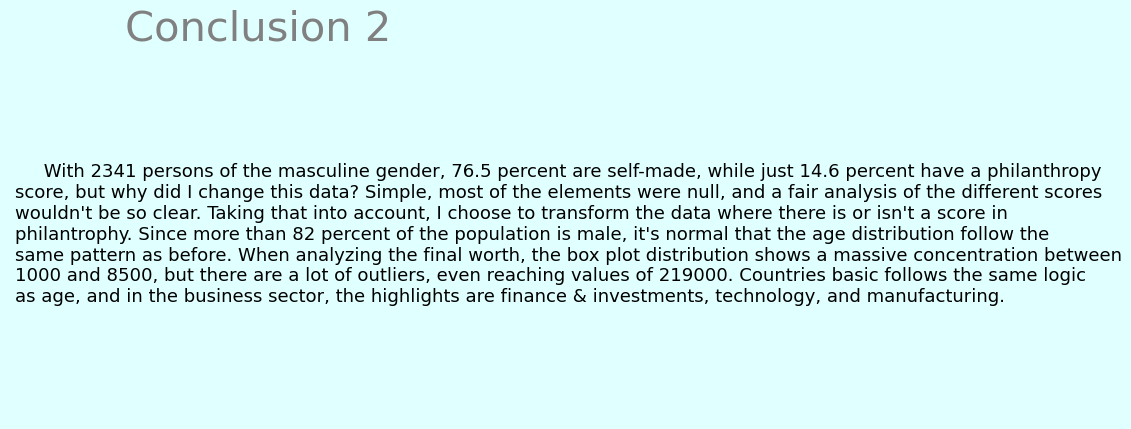

In [492]:
def conclusion(show):
    if show == 1:
        texto = """     Starting with an overall data analysis, the first piece of information obtained is about gender, 
where the majority of places are occupied by males (88.3%), while females account for only 11.7%. A self-made person is 
someone who construed his fortune from nothing or much less money than it is now. When this topic isanalyzed, it shows 
that around 71 percent did build their fortune, while 29 percent didn't, and the age distribution shows that 50 percent
of the age concentration is between 55 and 74, where the starting age to be inside the ranking is around 26, and less than
that is considered an outlier. When comparing the origin from those people, the two biggest economic powers show their 
faces, where 28.17 percent comes from the US and 21.51 percent comes from China, of course giving credit to India that comes 
in third place."""
    
    elif show == 2:
        texto = """     With 2341 persons of the masculine gender, 76.5 percent are self-made, while just 14.6 percent have a philanthropy 
score, but why did I change this data? Simple, most of the elements were null, and a fair analysis of the different scores 
wouldn't be so clear. Taking that into account, I choose to transform the data where there is or isn't a score in 
philantrophy. Since more than 82 percent of the population is male, it's normal that the age distribution follow the
same pattern as before. When analyzing the final worth, the box plot distribution shows a massive concentration between
1000 and 8500, but there are a lot of outliers, even reaching values of 219000. Countries basic follows the same logic
as age, and in the business sector, the highlights are finance & investments, technology, and manufacturing."""
    
    ax, fig = plt.subplots()

    fig.text(0.01,0.5,texto, horizontalalignment='left', verticalalignment='center', fontsize=13)
    fig.axis('off')
    fig.set_title(f'Conclusion {show}', fontsize=30, color='grey')
    ax.set_facecolor("lightcyan");   
    
    return plt.show();
        
        
conclusion(2)

[HOME](#inicio)

### Gender and Overall Analysis <a class='anchor' id='t3_2'></a>

####  Distribution <a class='anchor' id='t3_2_1'></a>

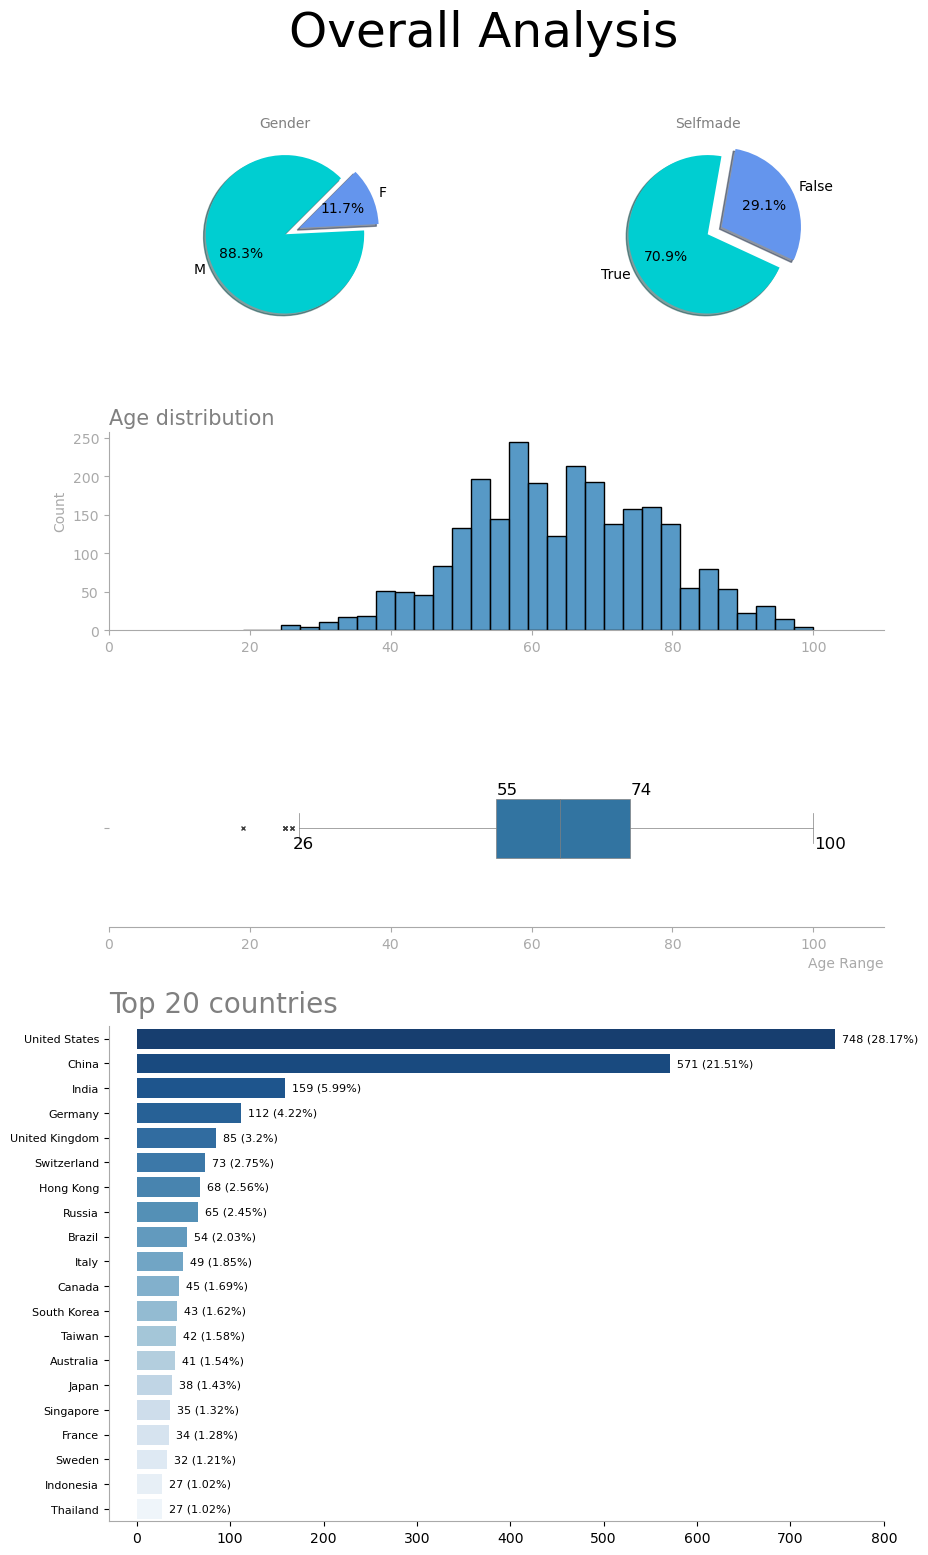

In [438]:
image_1()

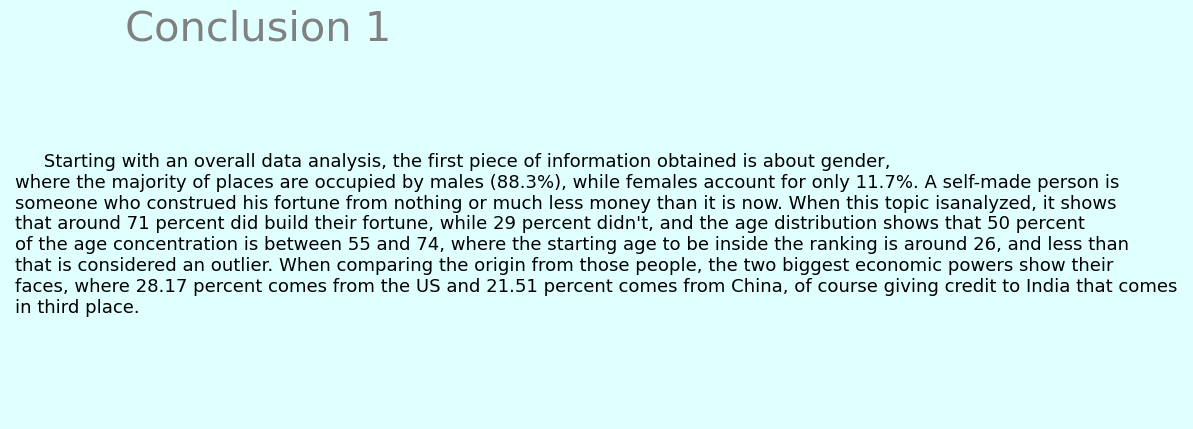

In [489]:
conclusion(1)

[HOME](#inicio)

####  Male Analyse <a class='anchor' id='t3_2_2'></a>

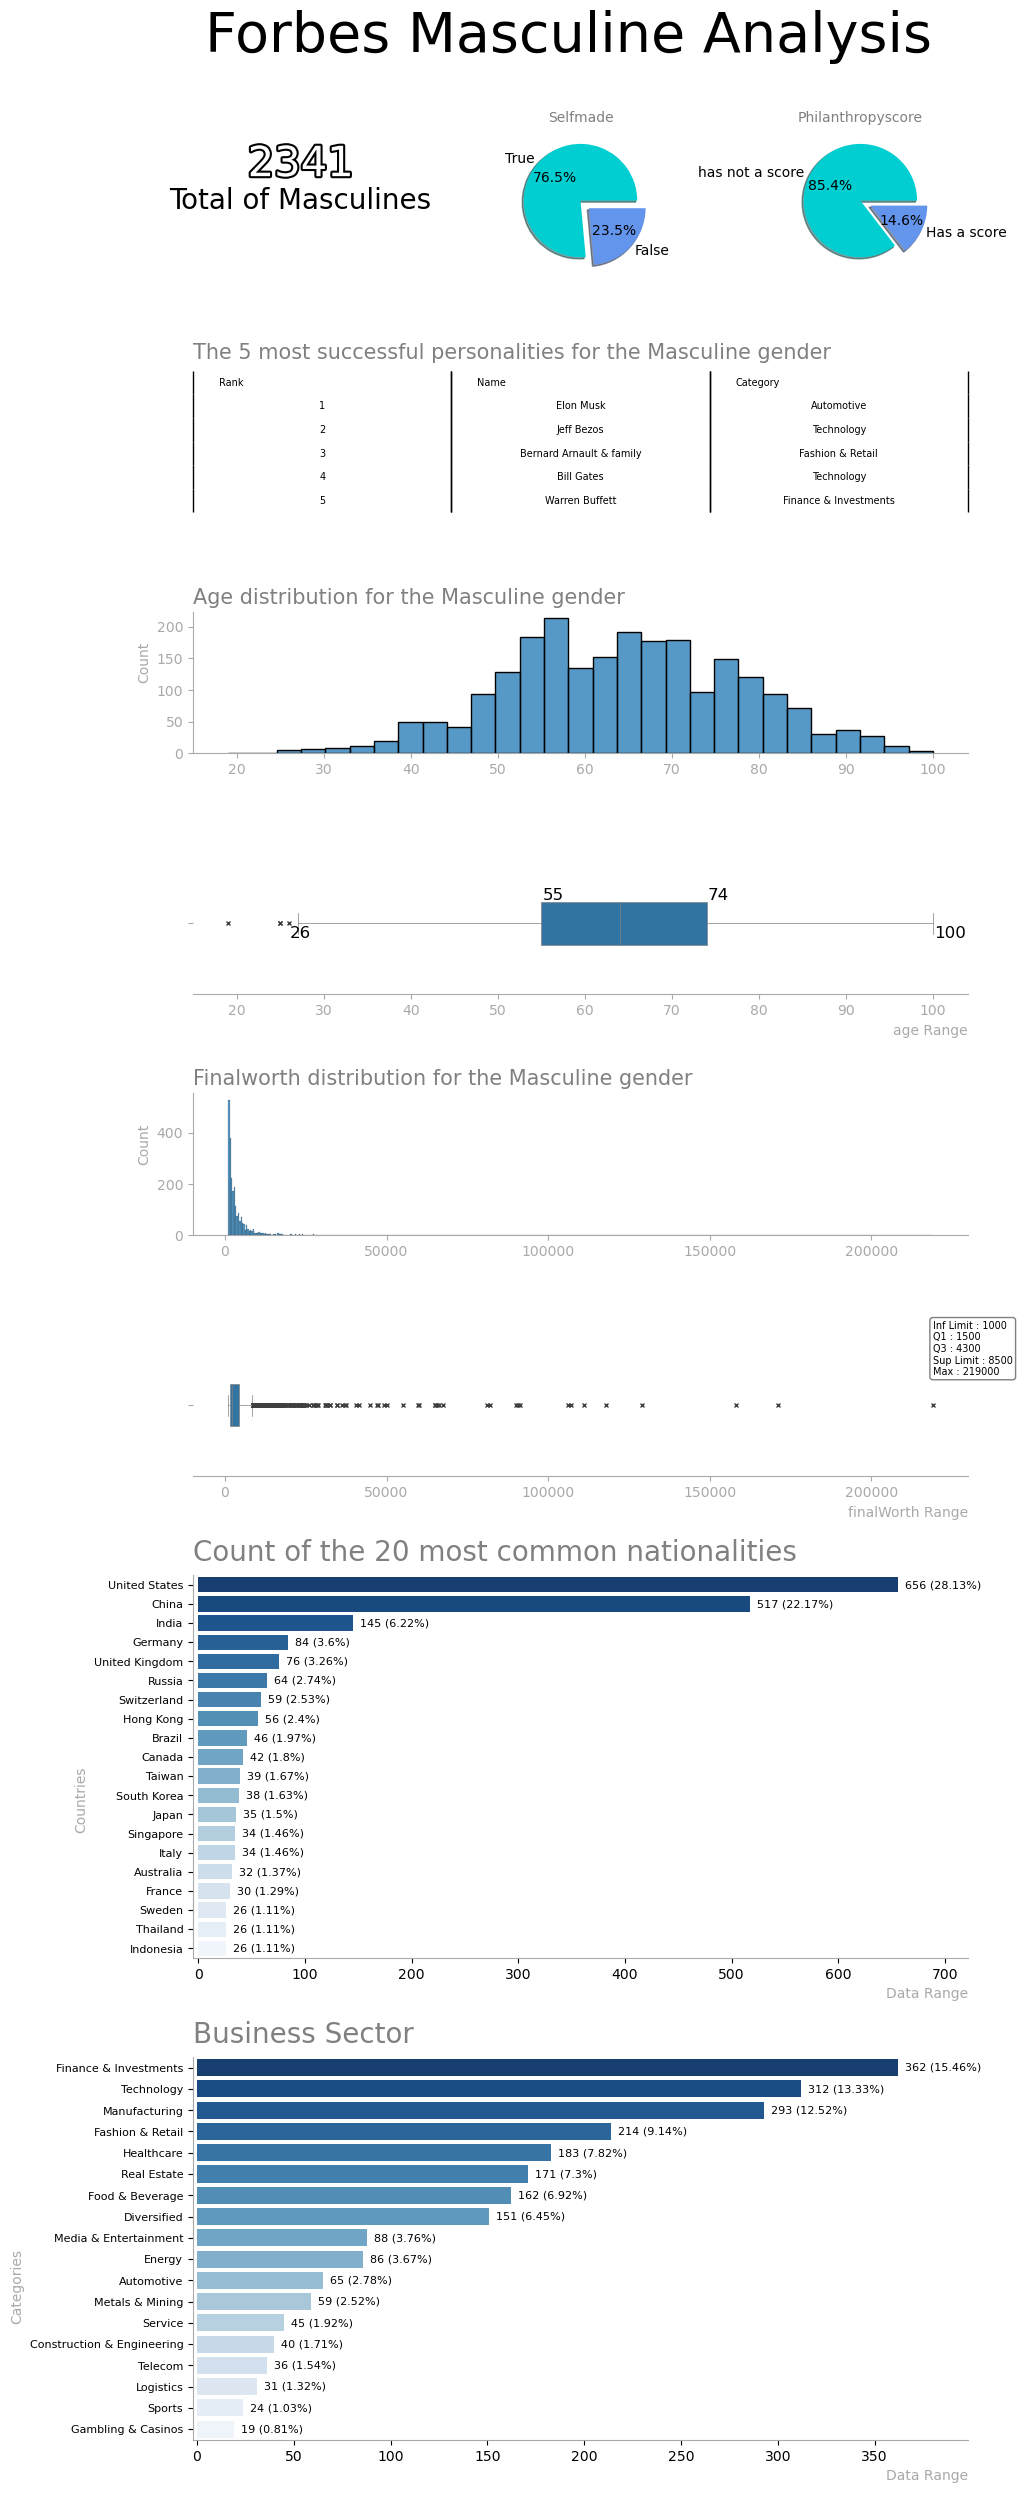

In [416]:
image_2('M')

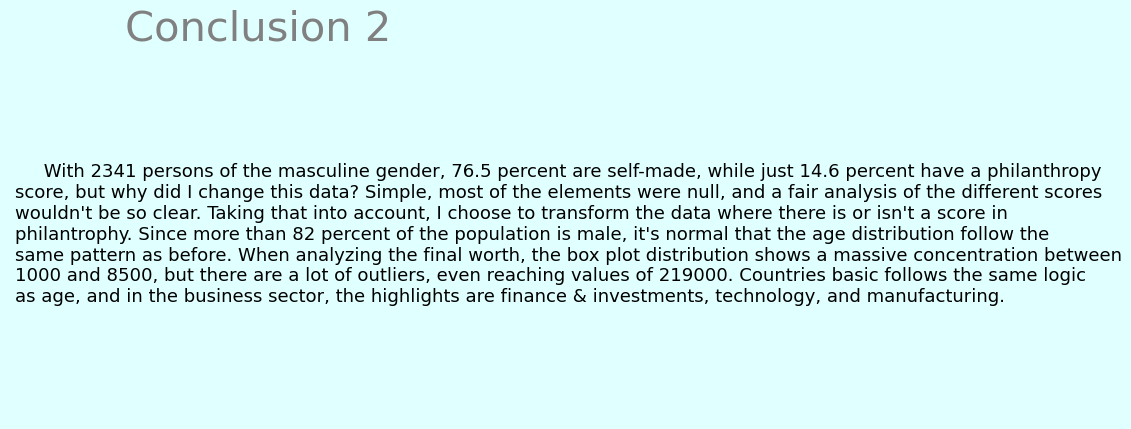

In [493]:
conclusion(2)

[HOME](#inicio)

####  Female Analyse <a class='anchor' id='t3_2_3'></a>

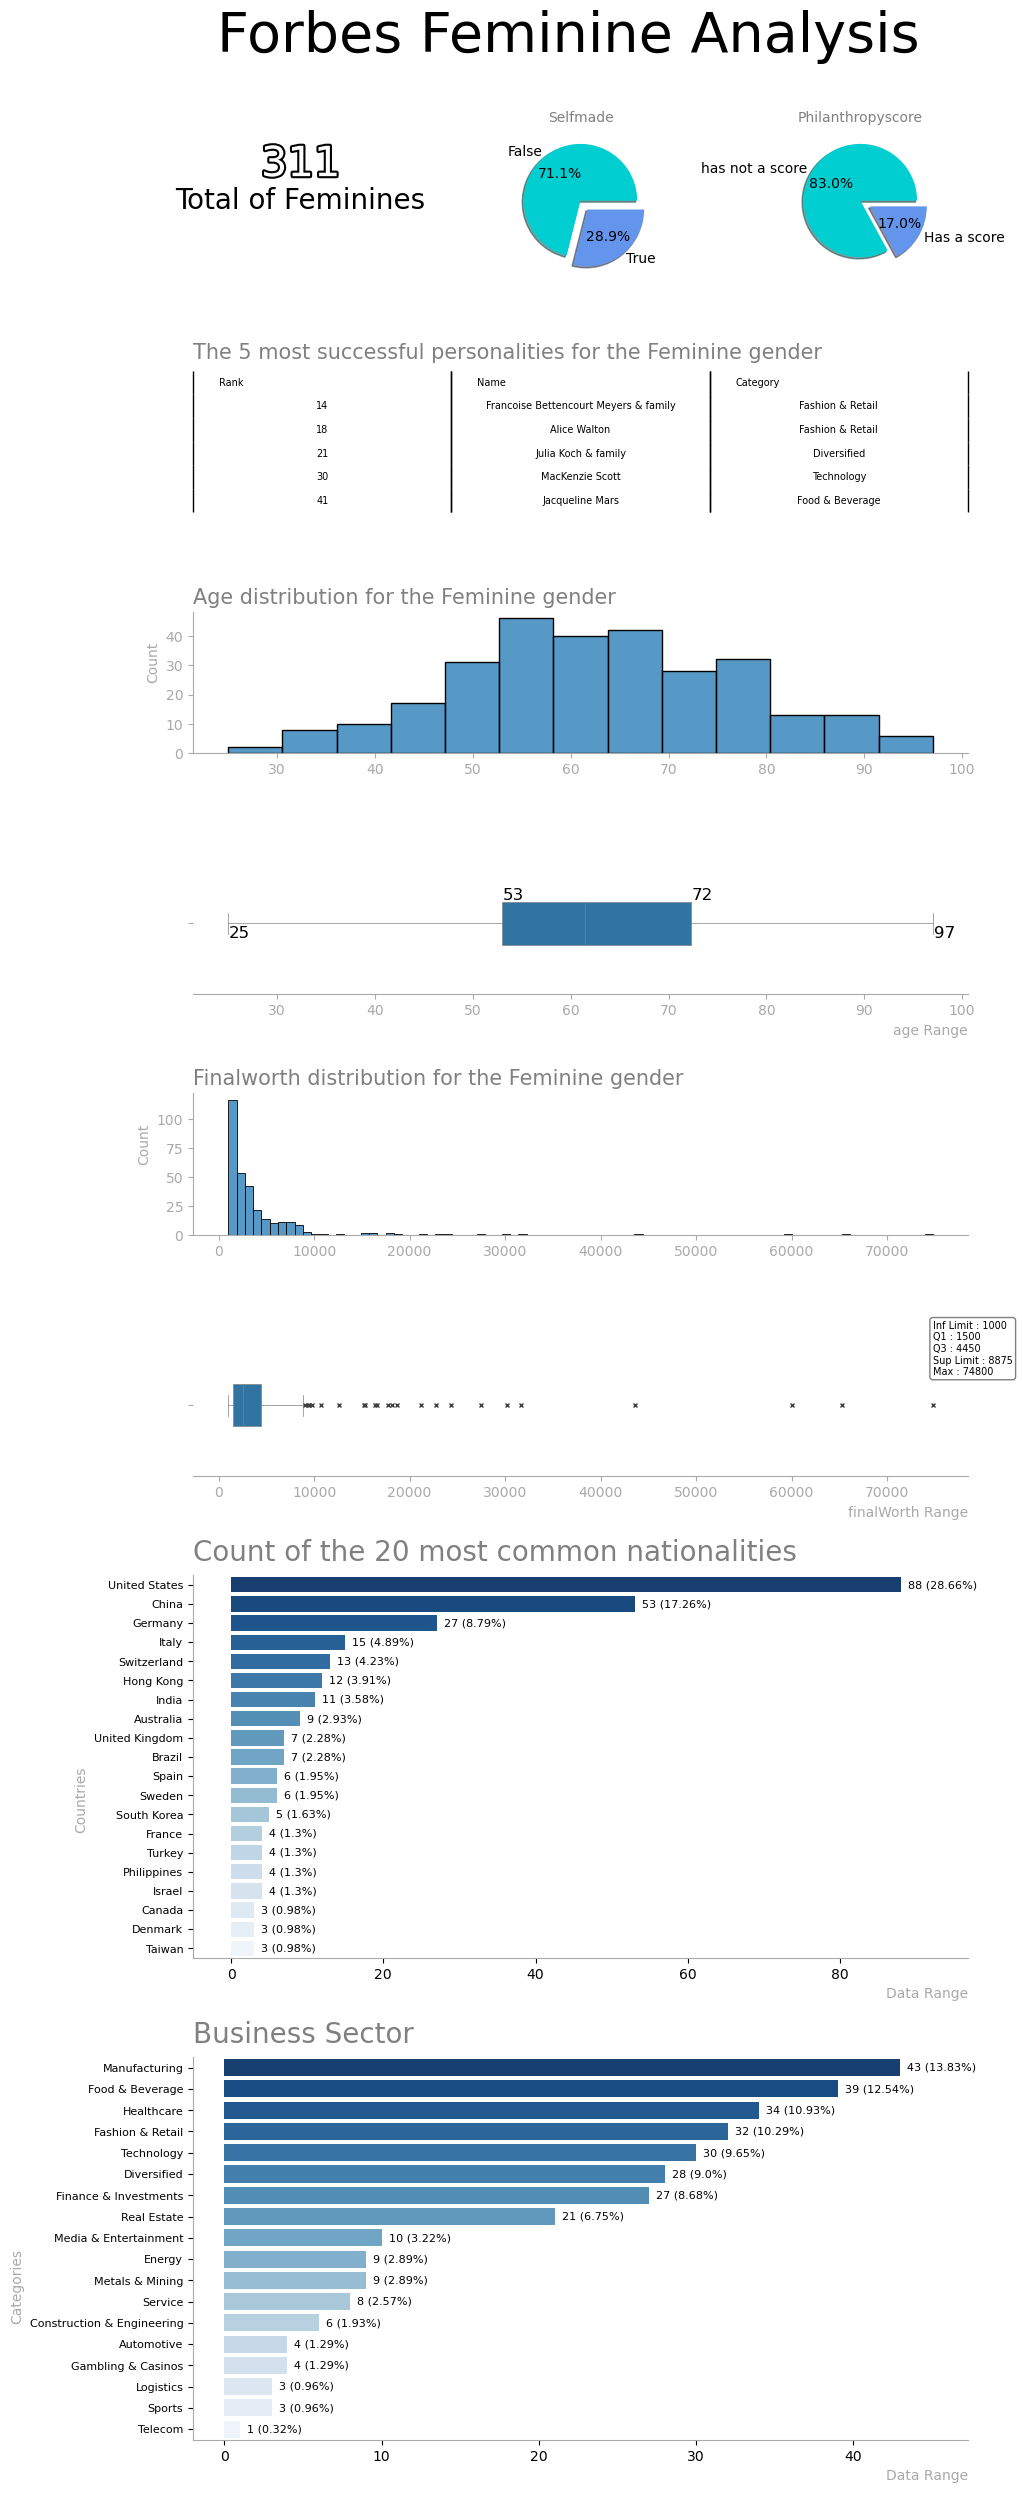

In [418]:
image_2('F')

[HOME](#inicio)

### Countries Analysis <a class='anchor' id='t3_3'></a>

#### United States <a class='anchor' id='#t3_3_1'></a>

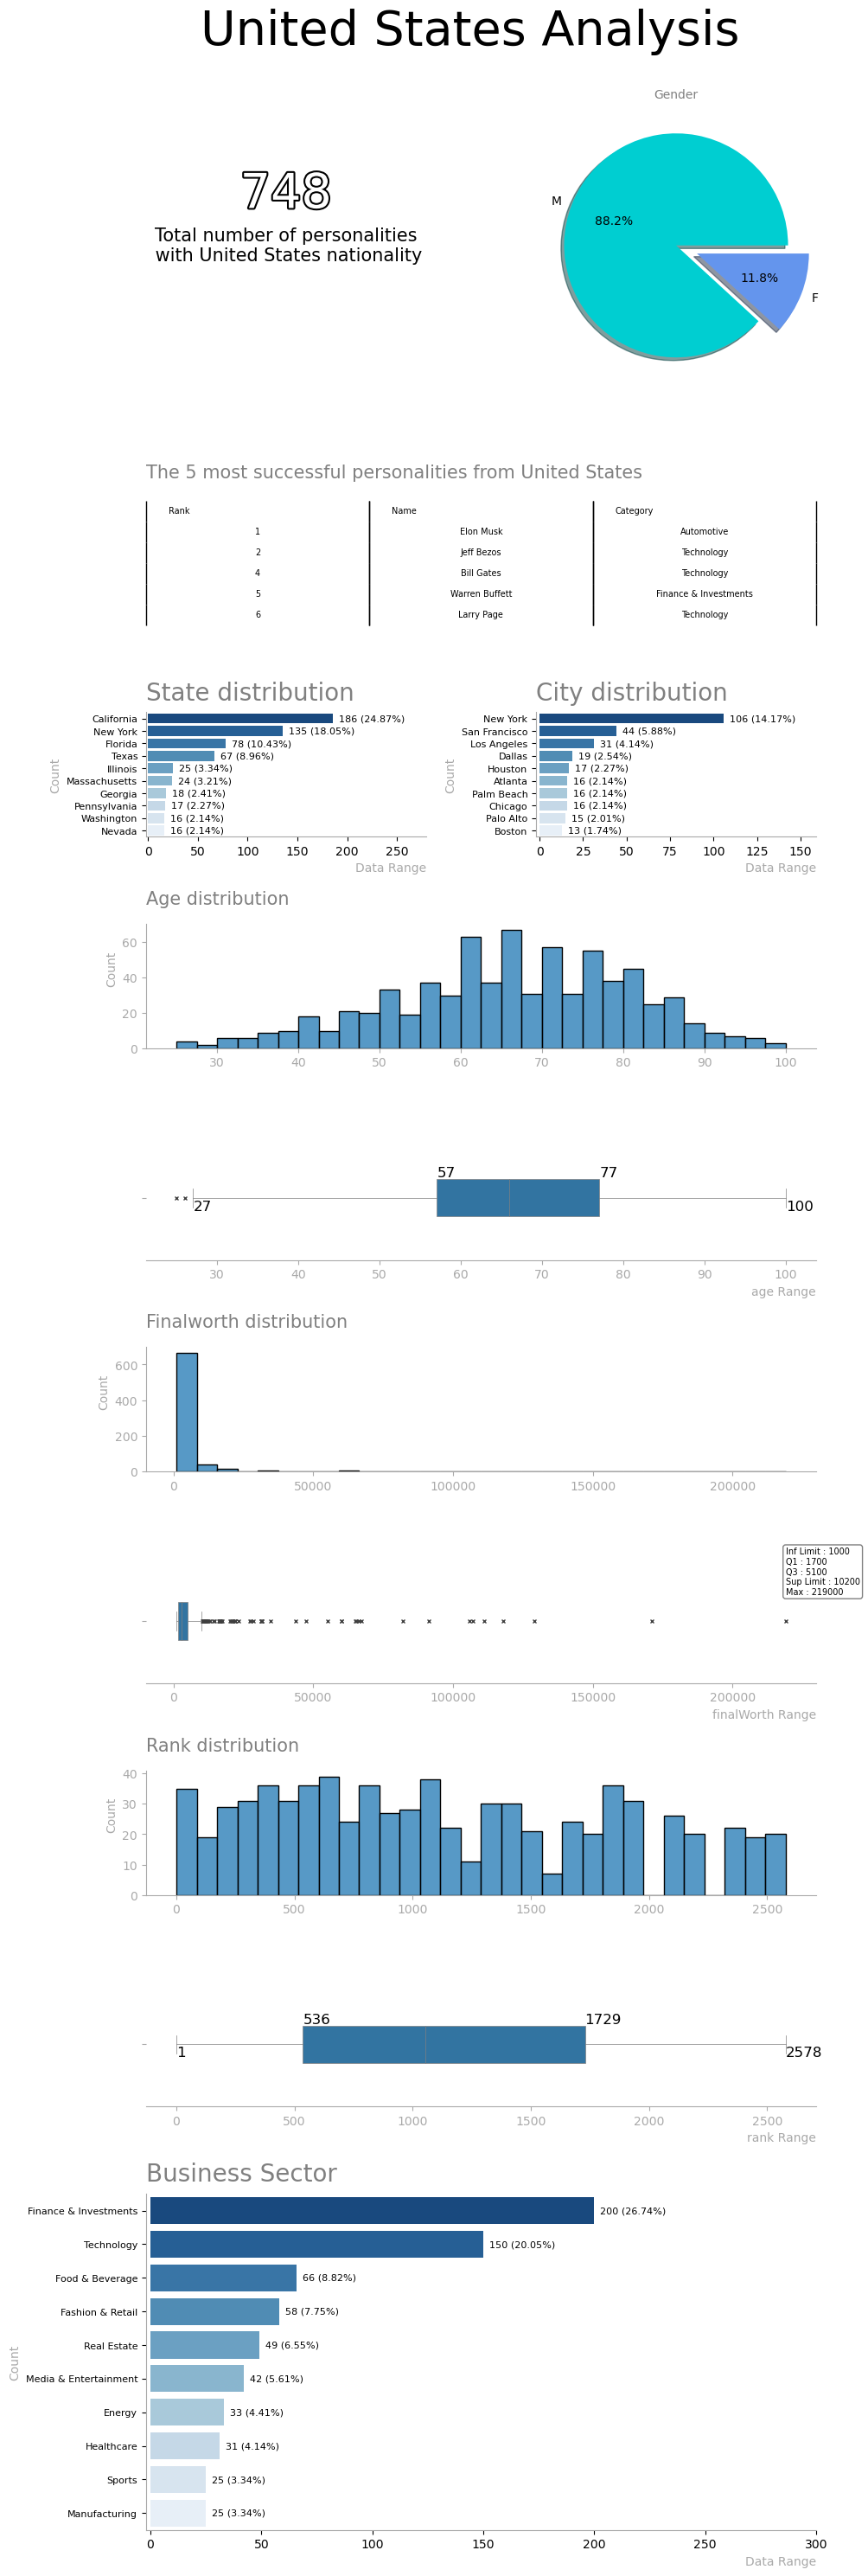

In [410]:
image_3("United States")

[HOME](#inicio)

#### China <a class='anchor' id='#t3_3_2'></a>

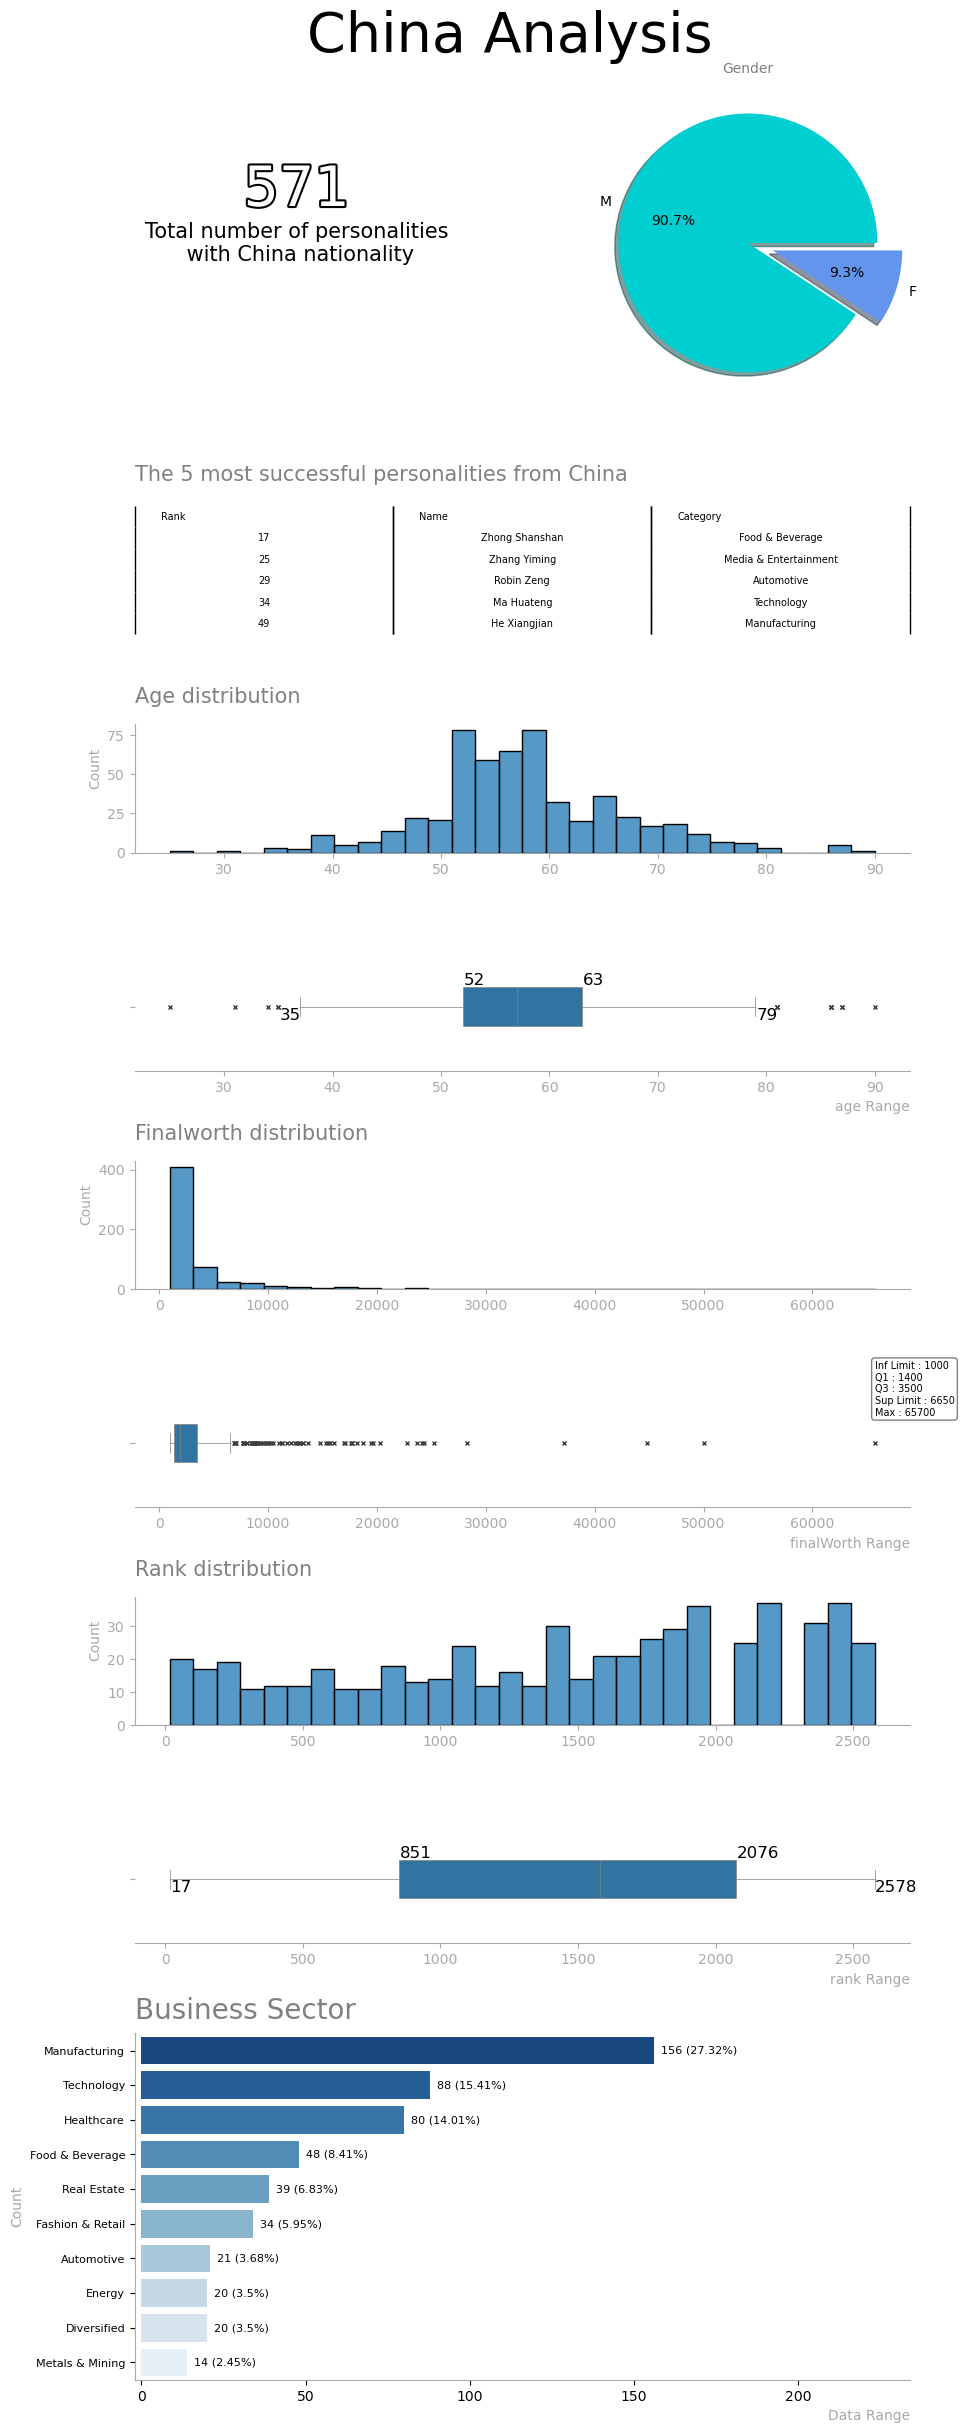

In [411]:
image_3("China")

[HOME](#inicio)

#### Brazil <a class='anchor' id='#t3_3_3'></a>

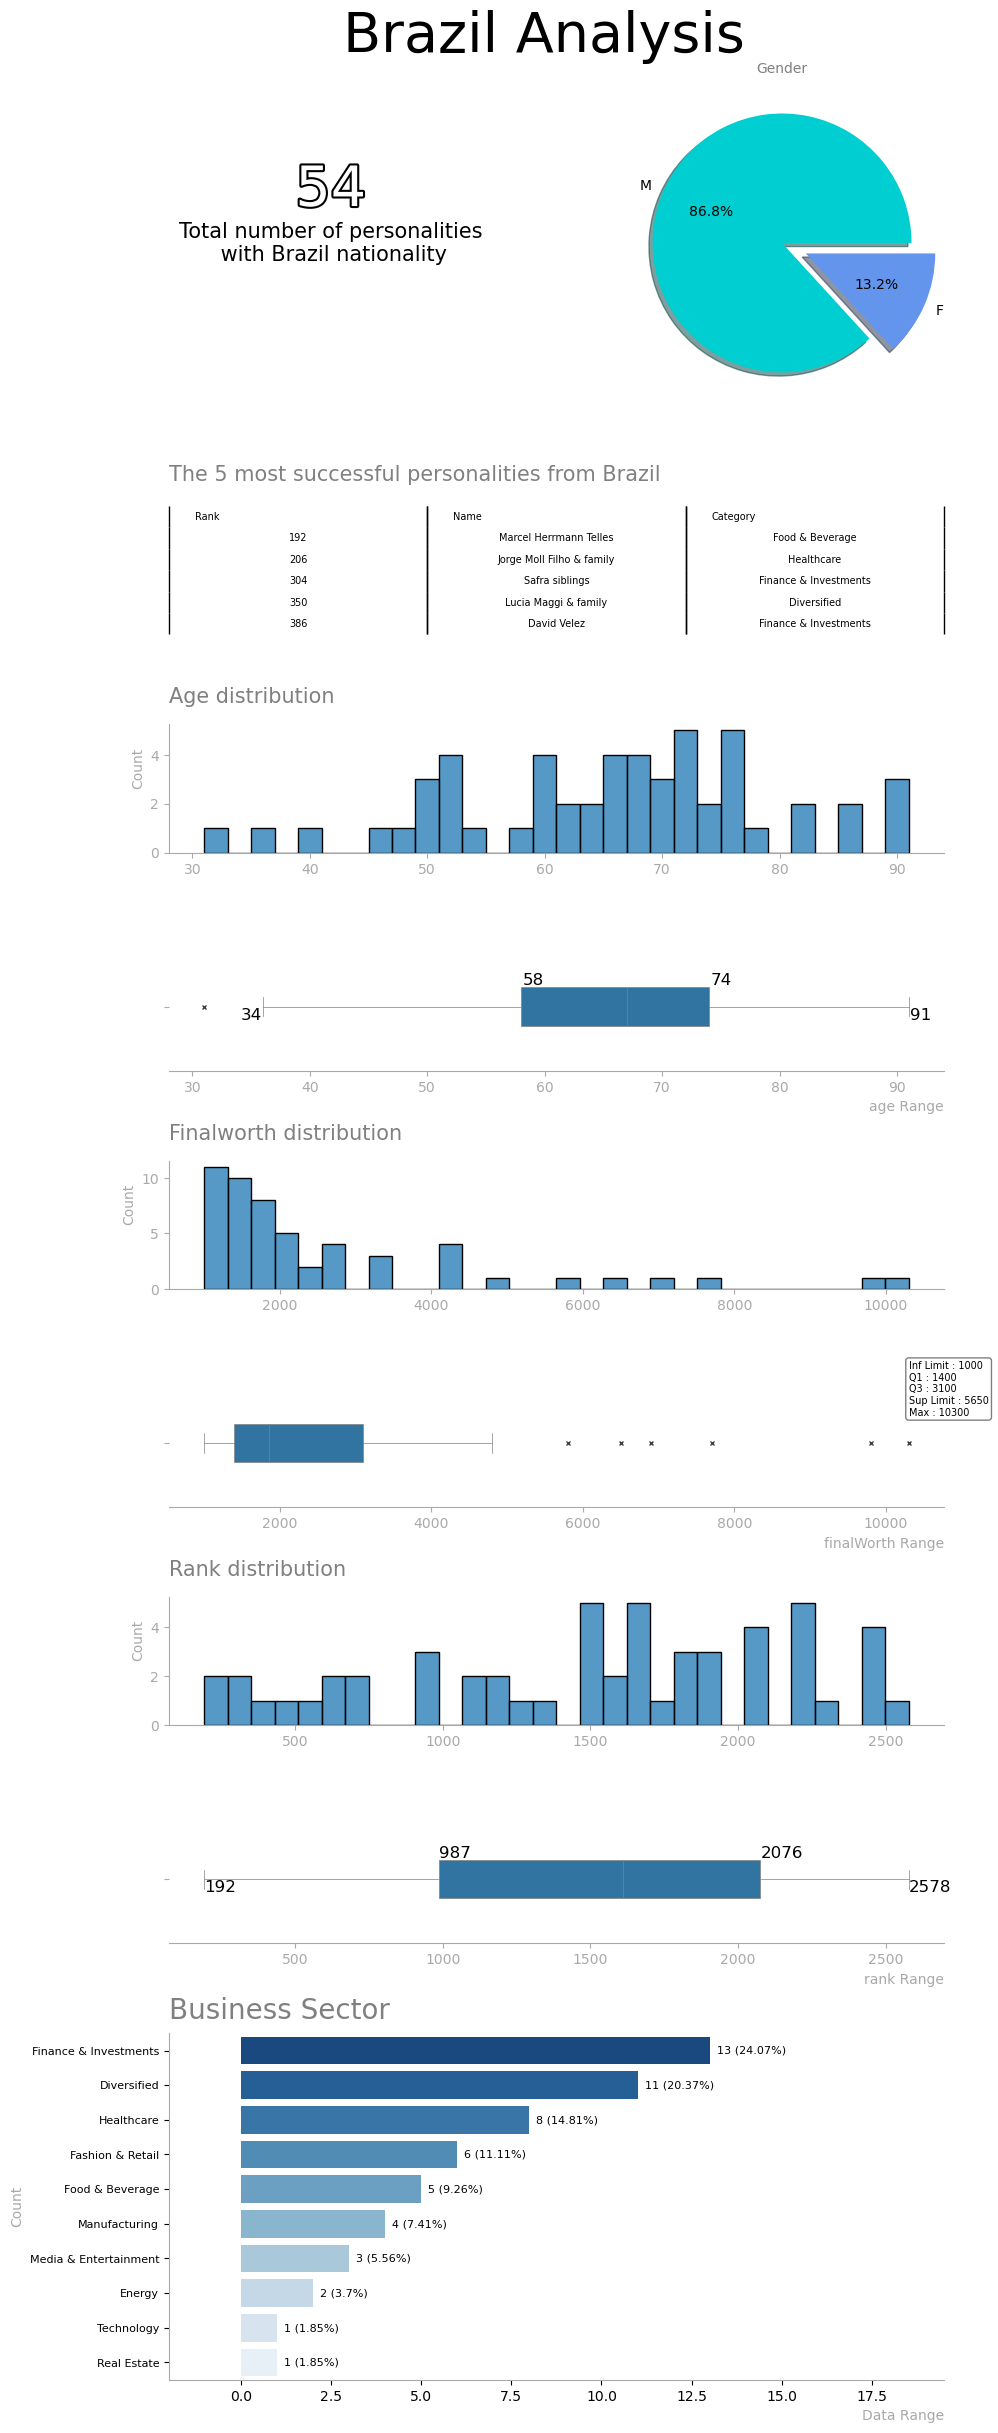

In [412]:
image_3("Brazil")

[HOME](#inicio)